In [5]:
import cooler
import scipy.sparse as sp
import pandas as pd
import numpy as np
import sys

    

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Path 
from matplotlib.ticker import EngFormatter

import cooltools
from cooltools.lib import plotting

import matplotlib as mpl
from matplotlib.colors import LogNorm, Normalize

import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable
mpl.rcParams['font.size'] = 10
%matplotlib inline
# this one to enable editing text in illustrator - from stackoverflow
mpl.rcParams['pdf.fonttype'] = 42


# helper functions for plotting
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True, formatter=bp_formatter):
    """format ticks with genomic coordinates as human readable"""
    if y:
        if formatter is not None:
            ax.yaxis.set_major_formatter(formatter)
    if x:
        if formatter is not None:
            ax.xaxis.set_major_formatter(formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

# had to redefine get_cmap from plotting because it was broken ...
def get_cmap(name):
    is_reversed = name.endswith("_r")
    try:
        if is_reversed:
            pal = plotting.PALETTES[name[:-2]][::-1]
        else:
            pal = plotting.PALETTES[name]
    except KeyError:
        raise ValueError('Palette not found "{}"'.format(name))
    return plotting.list_to_colormap(pal, name)

fall_hm = get_cmap("fall")



obs_norm = LogNorm(vmin=0.3, vmax=60)
ooe_norm = Normalize(vmin=-1.5, vmax=1.5)

# obs heatmap kwargs
obs_kwargs = dict(
#     cmap='fall', #cmap='fall'
    norm=obs_norm,
)
# ooe heatmap kwargs
ooe_kwargs = dict(
    cmap='fall',
    norm=ooe_norm,
)
# colorbar kwargs
colorbar_kwargs = dict(fraction=0.046, label='corrected frequencies')




def scan(filein,low,high,chromosome, masterlist):
    with open(filein) as f:
        ctr = 0
        f.readline()
        for line in f:
            c0,c1,c2,_,c4,c5,c6 = line.split()
            c1=int(c1)
            c2=int(c2)
            c4=int(c4)
            c5=int(c5)
            if c0==chromosome:
                if (low <= c1 and c2 <= high) and (low<=c4 and c5<=high):
                    ctr+=1
                    masterlist += [[c1,c2,c4,c5]]
    if ctr:
        return masterlist

from mpl_toolkits.axes_grid1 import make_axes_locatable


/home/spmoran/miniconda3/envs/cooler/lib/python3.9/site-packages/cooltools/lib/numutils.py:652: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def iterative_correction_symmetric(
/home/spmoran/miniconda3/envs/cooler/lib/python3.9/site-packages/cooltools/lib/numutils.py:727: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def iterative_correction_asymmetric(x, max_i

In [3]:
rect_kwargs = dict(
    lw=1,
    ec="grey",
    fc="none",
    alpha=1,
)
    
fall_hm = get_cmap("fall")


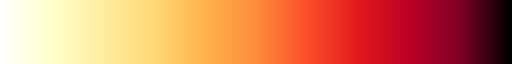

In [4]:
fall_hm

In [6]:
obs_kwargs = dict(
    cmap='fall',
    norm=obs_norm,
)


Quagga = np.load("/home/spmoran/temp_smoran/Fan_StripeCaller/053024_APA_PileUp/result_ABmerged/mat_Quagga.npy")

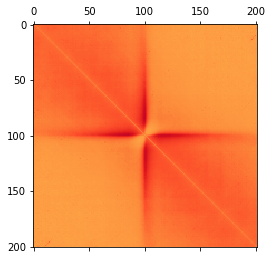

In [7]:
obs_norm = Normalize(vmin=0.01, vmax=2)
obs_kwargs = dict(
    cmap='fall',
    norm=obs_norm,
)

plt.matshow(Quagga,**obs_kwargs)


In [8]:
obs_norm = Normalize(vmin=0.01, vmax=2)
obs_kwargs = dict(
    cmap='fall',
    norm=obs_norm,
)


Zebra = np.load("/home/spmoran/temp_smoran/Fan_StripeCaller/053024_APA_PileUp/result_ABmerged/mat_Zebra.npy")

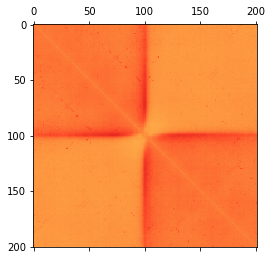

In [9]:
obs_norm = Normalize(vmin=0.01, vmax=2)
obs_kwargs = dict(
    cmap='fall',
    norm=obs_norm,
)

plt.matshow(Zebra,**obs_kwargs)


In [10]:
obs_norm = Normalize(vmin=0.01, vmax=2)
obs_kwargs = dict(
    cmap='fall',
    norm=obs_norm,
)


SNN = np.load("/home/spmoran/temp_smoran/Fan_StripeCaller/053024_APA_PileUp/result_ABmerged/mat_StripeNN.npy")

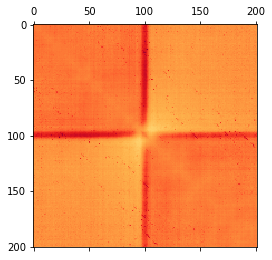

In [11]:
obs_norm = Normalize(vmin=0.01, vmax=2)
obs_kwargs = dict(
    cmap='fall',
    norm=obs_norm,
)

plt.matshow(SNN,**obs_kwargs)


In [13]:
!ls /home/spmoran/temp_smoran/Fan_StripeCaller/053024_APA_PileUp/result_ABlen

mat_Quagga.npy	mat_StripeNN.npy  mat_Zebra.npy


In [15]:
Quagga_len = np.load("/home/spmoran/temp_smoran/Fan_StripeCaller/053024_APA_PileUp/result_ABlen/mat_Quagga.npy")
Zebra_len = np.load("/home/spmoran/temp_smoran/Fan_StripeCaller/053024_APA_PileUp/result_ABlen/mat_Zebra.npy")
SNN_len = np.load("/home/spmoran/temp_smoran/Fan_StripeCaller/053024_APA_PileUp/result_ABlen/mat_StripeNN.npy")

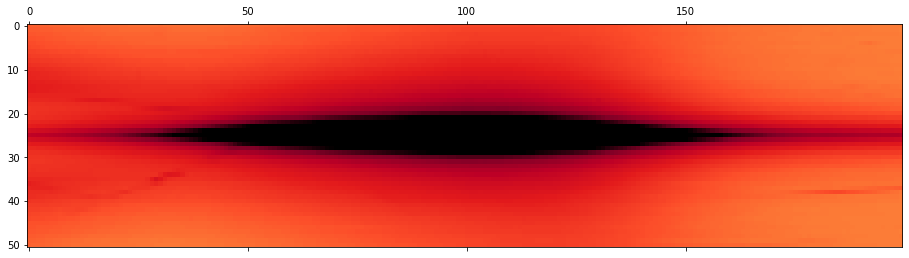

In [19]:
obs_norm = Normalize(vmin=0.01, vmax=2)
# obs_norm = LogNorm(vmin=0.4, vmax=4.2)
obs_kwargs = dict(
    cmap='fall',
    norm=obs_norm,
)

plt.matshow(Quagga_len,**obs_kwargs)


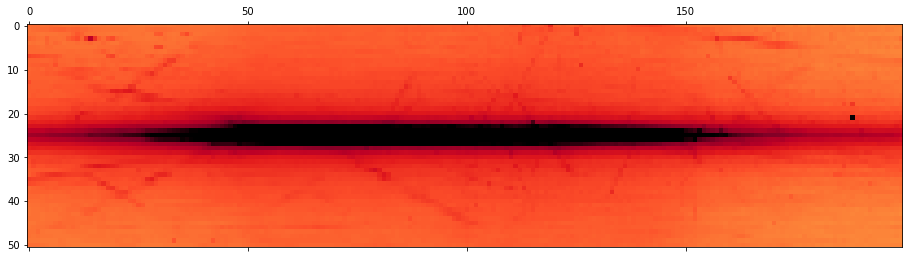

In [20]:
obs_norm = Normalize(vmin=0.01, vmax=2)
# obs_norm = LogNorm(vmin=0.4, vmax=4.2)
obs_kwargs = dict(
    cmap='fall',
    norm=obs_norm,
)

plt.matshow(Zebra_len,**obs_kwargs)


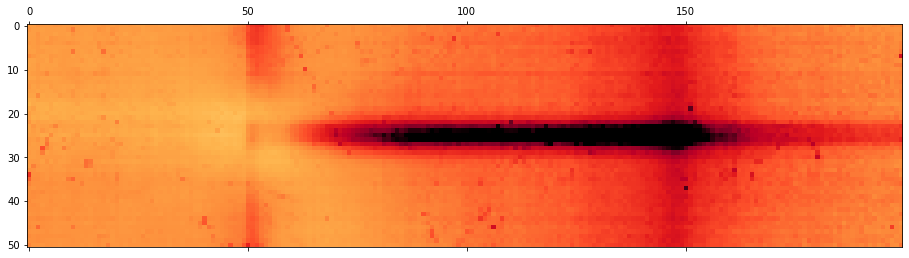

In [21]:
obs_norm = Normalize(vmin=0.01, vmax=2)
# obs_norm = LogNorm(vmin=0.4, vmax=4.2)
obs_kwargs = dict(
    cmap='fall',
    norm=obs_norm,
)

plt.matshow(SNN_len,**obs_kwargs)
